# 1.5 Método de *punto fijo*

[![Open In Colab](./imagenes/colab-badge.png)](https://colab.research.google.com/github/caramirezs/MetNum_librodigital/blob/master/1_Ecuaciones_de_una_variable/1.5_Metodo_de_punto_fijo.ipynb)

In [48]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def graficar(f, x_i, x_f, num=1000):
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: figura y objeto de ejes para la gráfica de la función
    """
    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    # Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
    x = np.linspace(x_i, x_f, num)
    # Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
    # figsize se utiliza para establecer el tamaño de la figura.
    fig, ax = plt.subplots(figsize=(20,8))
    # Grafica la función f(x) en el objeto de ejes creado anteriormente.
    ax.plot(x, f(x))
    # Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # label size de los ejes
    ax.tick_params(labelsize=20, axis='x')
    ax.tick_params(labelsize=20, axis='y')
    # Agrega flechas a los ejes x e y para indicar su dirección.
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    # Devuelve la figura y el objeto de ejes para que puedan ser manipulados y mostrados según se desee.
    return fig, ax

def met_punto_fijo(g, p_0, tol=1e-4, n=200, verbose=True):
        """
        Método del punto fijo
        :param g: Funcion transformada -> punto fijo
        :param p_0: semilla
        :param tol: toleracia, criterio de parada
        :param n: número máximo de iteraciones, criterio de parada
        :param verbose:
        :return: solución exacta o aproximada, si tiene.
        """
        i = 1
        if verbose:
            print(f'ite 0: p_0 = {p_0:.5f}')
        while i <= n:
            try:
                p_i = g(p_0)
                e_abs = abs(p_0 - p_i)
                if verbose:
                    print(f'ite {i:<2}: p_{i:<2}={p_i:.5f}, e_abs: {e_abs:e}')
                if g(p_i) == p_i:
                    print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
                    return p_i

                if e_abs < tol:
                    print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
                    return p_i

            except OverflowError:
                print('solución no encontrada, OverflowError')
                return None
            p_0 = p_i
            i += 1
        print('solución no encontrada, iteraciones agotadas')
        return None

## Introducción

Antes de entrar en detalles sobre el método de punto fijo, es importante comprender lo que es un **punto fijo**. Un punto fijo para una función es un número en el que el valor de la función no cambia cuando se aplica la función. Formalmente, un punto fijo para una función $g(x)$ se define como un número $x$ tal que $g(x) = x$. Es decir, un punto fijo es un número que cuando se usa como entrada para la función, el resultado de la función es igual al número de entrada.

El método de punto fijo se basa en la idea de **transformar** la ecuación original en una forma equivalente que tenga un punto fijo, es decir, una ecuación que sea igual a $x$. La estrategia es iterar una función apropiada a partir de una aproximación inicial, y converger hacia el punto fijo de esa función.

Dada la ecuación $f(x) = 0$ como las que hemos resuelto con los metodos anteriores, lo primero que debemos hacer es transformar la ecuación a una equivalente de la forma $g(x)=x$ y a partir de aquí comenzar a iterar para encontrar el punto fijo de $g$, que corresponde a la raíz de $f$ y a la solución de la ecuación original $f(x) = 0$

Para ilustrar la aplicación del método de punto fijo, consideremos la ecuación no lineal $\sin(2+ \pi+x) - x + 0.5 = 0$, supongamos que encontrar una solución con una precisión de $10^{-4}$. Definimos la función $f(x) = \sin(2+\pi+x) - x + 0.5$. En este caso la transformación de la ecuación puede ser $\sin(2+\pi+x) + 0.5 = x$, de donde $g(x) = sin(2+\pi+x) + 0.5$ es la función que debemos iterar. Elegimos una semilla $p_0 = 1$, la evaluamos en $g(x)$ para encontrar la siguiente aproximación, y repetimos el proceso hasta que lleguemos a la solución con la precisión deseada.

El siguiente código ilustra este proceso, la imagen de la izquierda corresponde a la función original $f(x)$, en la derecha está la función transformada $g(x)$ junto con las iteraciones hasta llegar a la respuesta deseada.

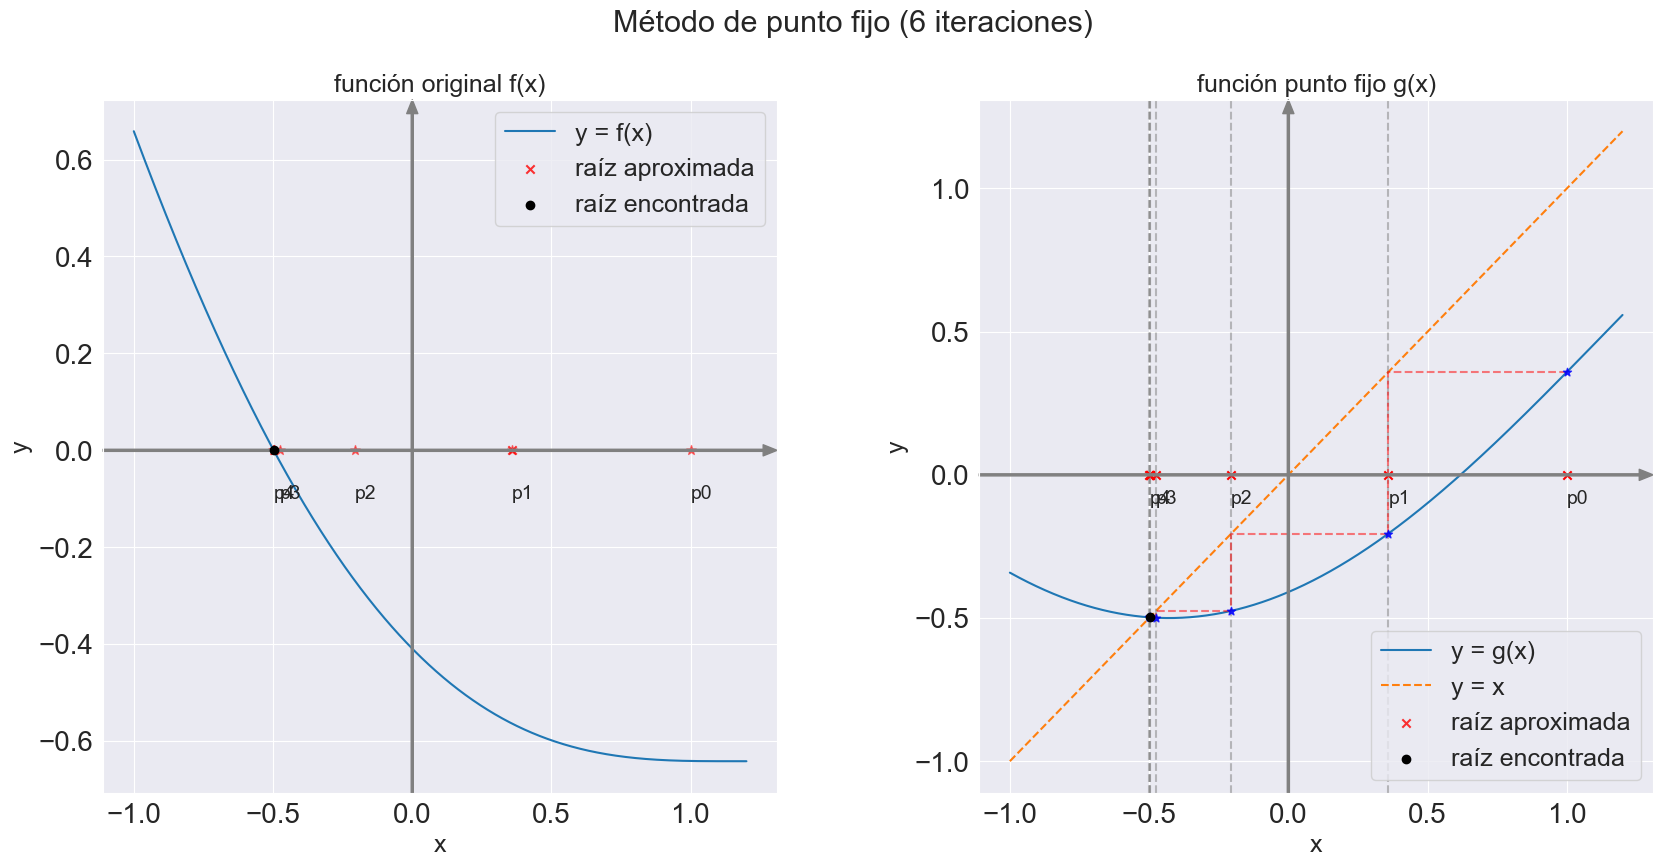

La secuencia para encontrar la solución fue: [1, 0.3589, -0.2052, -0.475, -0.499, -0.4976, -0.4977]


In [49]:
# EJECUTAR ESTA CELDA
# Definir la función
f = lambda x: np.sin(2+np.pi+x) - x + 0.5
g = lambda x: np.sin(2+np.pi+x) + 0.5
# Definir el intervalo, tolerancia y No. máximo de iteraciones
p_0 = 1
tolerancia = 1e-4
max_ite = 100

# Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
x_i, x_f = -1, 1.2
x = np.linspace(x_i, x_f, 1000)
# Inicializar la lista de aproximaciones
lista_sol = [p_0]

sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
# Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
# figsize se utiliza para establecer el tamaño de la figura.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9), gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1]})
fig.subplots_adjust(wspace=0.3)

# Grafica del punto fijo
ax2.plot(x, g(x), label='y = g(x)')
ax2.plot(x, x, label='y = x', linestyle='--')

ax2.scatter(p_0, g(p_0), color='blue', alpha=0.8, marker='*', zorder=3)
ax2.scatter(p_0, 0, color='red', alpha=1, marker='x', zorder=2)
plt.text(p_0, -0.1, f"p0", fontsize=14)

# Iterar hasta que la tolerancia sea alcanzada o se supere el número máximo de iteraciones
ite= 1
while ite <= max_ite:
    if g(p_0) == p_0:
        break
    p_i = g(p_0)  # punto fijo
    # Agregar p_i a la lista de aproximaciones
    lista_sol.append(round(p_i,4))

    # Graficar la línea vertical en p_i y el punto en la grafica
    ax2.axvline(x=p_i, linestyle='--', color='gray', alpha=0.5, zorder=2)
    ax2.scatter(p_i, g(p_i), color='blue', alpha=0.8, marker='*', zorder=3)
    ax2.scatter(p_i, 0, color='red', alpha=1, marker='x', zorder=2)
    # texto
    if ite <= 4:
        ax2.text(p_i, -0.1, f"p{ite}", fontsize=14)
        ax2.plot([p_0, p_i, p_i], [g(p_0), p_i, g(p_i)], '--', color='red', alpha=0.5, zorder=2)

    if abs(p_i-p_0) < tolerancia:
        break
    p_0 = p_i
    ite += 1

#Graficar el punto final encontrado
ax2.scatter(p_i, 0, color='red', alpha=0.8, marker='x', label='raíz aproximada')
ax2.scatter(p_i, g(p_i), color='black', label='raíz encontrada', zorder=3)

xmin, xmax = ax2.get_xlim()
ymin, ymax = ax2.get_ylim()
ax2.tick_params(labelsize=20, axis='x')
ax2.tick_params(labelsize=20, axis='y')
ax2.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax2.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax2.set_xlabel('x',fontsize=18)
ax2.set_ylabel('y',fontsize=18)
ax2.set_title('función punto fijo g(x)', fontsize=18)
ax2.legend(fontsize=18)

# Grafica original
ax1.plot(x, f(x), label='y = f(x)')
ax1.scatter(lista_sol, np.zeros(ite + 1), marker='*',color='red', alpha=0.5, zorder=2, s=50)
for i in range(5):
    ax1.text(lista_sol[i], -0.1, f"p{i}", fontsize=14)
ax1.scatter(lista_sol[1], 0, color='red', alpha=0.8, marker='x', label='raíz aproximada')
ax1.scatter(lista_sol[-1], 0, color='black', label='raíz encontrada', zorder=3)
xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()
ax1.tick_params(labelsize=20, axis='x')
ax1.tick_params(labelsize=20, axis='y')
ax1.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax1.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax1.set_xlabel('x',fontsize=18)
ax1.set_ylabel('y',fontsize=18)
ax1.set_title('función original f(x)', fontsize=18)
ax1.legend(fontsize=18)

fig.suptitle(f'Método de punto fijo ({ite} iteraciones)', fontsize=22)
plt.show()
print(f'La secuencia para encontrar la solución fue: {lista_sol}')

La forma general del método de punto fijo es la siguiente:

1. Escribir la ecuación original en la forma equivalente $x = g(x)$, donde $g$ es una función que tiene un punto fijo en la solución que se busca.
2. Elegir una aproximación inicial $p_0$.
3. Iterar la función $g$ a partir de la aproximación inicial: $p_{n+1} = g(p_n)$.
4. Repetir el paso 3 hasta que se alcance una precisión deseada o se llegue al número máximo de iteraciones permitido.

La convergencia del método de punto fijo depende de la elección de la función $g$ y de la aproximación inicial. Se puede demostrar que si la función $g$ es continua y tiene una derivada acotada entre -1 y 1 en un intervalo cerrado, entonces el método de punto fijo converge a un punto fijo de $g$ cerca de la aproximación inicial.

Es importante tener en cuenta que el método de punto fijo no siempre converge, y en algunos casos puede converger a un punto fijo incorrecto o diverger. Por lo tanto, es fundamental seleccionar una buena aproximación inicial y una función $g$ adecuada para garantizar la convergencia del método.

Las siguientes condiciones son suficientes para la existencia y unicidad de un puto fijo:
i) Si $g \in C[a,b]$ y $g(x) \in [a,b]$ para todo $x \in [a,b]$, entonces $g$ tiene por lo menos un punto fijo en $[a,b]$.
ii) Si, además, $g'(x)$ existe en $(a,b)$ y $|g'(x)| < 1$ para todo $x \in (a,b)$, entonces existe exactamente un punto fijo en $[a,b]$.

La convergencia del método **completar**

**Observación**: Se debe tener en cuenta que al implementar el método de punto fijo, se debe establecer un número máximo de iteraciones, ya que no todas las fórmulas convergen y el programa puede caer en un ciclo infinito tratando de alcanzar una solución que nunca se alcanzará.

Ejemplo:

Para ilustrar el método de punto fijo, consideremos la ecuación no lineal $x^3 + 2x^2 - 4 == 0$ cuya única raíz real están en $[0,1.5]$. Podemos encontrar varias maneras de transformar la ecuación a la forma de punto fijo. Por ejemplo:
1. Sumando $x$ a ambos lados de la igualdad se llega a la ecuación: $x^3 + 2x^2 + x - 4 = x$. $g_1(x) = x^3 + 2x^2 + x - 4 $
2. Manipulando la ecuación para despejar $x$: $2x^2  = 4 - x^3$, $x  = \dfrac{4 - x^3}{2x}$. $g_2(x) = \dfrac{4 - x^3}{2x}$
3. Manipulando la ecuación para despejar $x$: $2x^2  = 4 - x^3$, $x  = \pm \sqrt{\dfrac{4 - x^3}{2}}$. $g_3(x) = \sqrt{\dfrac{4 - x^3}{2}}$, $g_4(x) = -\sqrt{\dfrac{4 - x^3}{2}}$

Para identificar una solución positiva de la ecuación podemos utilizar $g_1(x)$, $g_2(x)$ o $g_3(x)$, podemos graficar la función junto con la curva $y=x$ para identificar el punto fijo, la siguiente figura muestra las tres transformaciones y el punto fijo en cada una de ellas, note que el valor de $p$ es el mismo en todas.
<img src="./imagenes/punto_fijo.png" alt="figura1" width="1000">

El problema radica en que aunque exista el punto fijo, la fórmula $p_{n+1} = g{p_n)$ no siembre da una sucesión de $p_n$ que converja a $p$, al aplicar el método `met_punto_fijo` a cada función podemos ver que en algunas ocasiones las soluciones divergen, para nuestro ejemplo, solamente la tercera función: $g_3(x) = \sqrt{\dfrac{4 - x^3}{2}}$ nos permite encontrar la solución deseada.

In [50]:
g_1 = lambda x: x**3 + 2*x**2 + x -4
g_2 = lambda x: (4 - x**3)/(2*x)
g_3 = lambda x: np.sqrt((4 - x**3)/(2))
p_0 = 1.1

In [51]:
# aplicar el métdodo a g_1
met_punto_fijo(g_1, p_0)

ite 0: p_0 = 1.10000
ite 1 : p_1 =0.85100, e_abs: 2.490000e-01
ite 2 : p_2 =-1.08430, e_abs: 1.935303e+00
ite 3 : p_3 =-4.00771, e_abs: 2.923403e+00
ite 4 : p_4 =-40.25490, e_abs: 3.624719e+01
ite 5 : p_5 =-62034.65794, e_abs: 6.199440e+04
ite 6 : p_6 =-238720202230765.15625, e_abs: 2.387202e+14
ite 7 : p_7 =-13604028124595653580634957090670773717172224.00000, e_abs: 1.360403e+43
ite 8 : p_8 =-2517691787853136170579139775518360848101516303679879099979608795617746359183096866523840682159060517144406271856874810305618640896.00000, e_abs: 2.517692e+129
solución no encontrada, OverflowError


In [52]:
# aplicar el métdodo a g_2
met_punto_fijo(g_2, p_0)

ite 0: p_0 = 1.10000
ite 1 : p_1 =1.21318, e_abs: 1.131818e-01
ite 2 : p_2 =0.91265, e_abs: 3.005294e-01
ite 3 : p_3 =1.77495, e_abs: 8.622950e-01
ite 4 : p_4 =-0.44843, e_abs: 2.223373e+00
ite 5 : p_5 =-4.56059, e_abs: 4.112169e+00
ite 6 : p_6 =-10.83805, e_abs: 6.277454e+00
ite 7 : p_7 =-58.91618, e_abs: 4.807813e+01
ite 8 : p_8 =-1735.59226, e_abs: 1.676676e+03
ite 9 : p_9 =-1506140.25036, e_abs: 1.504405e+06
ite 10: p_10=-1134229226881.24243, e_abs: 1.134228e+12
ite 11: p_11=-643237969555810395619328.00000, e_abs: 6.432380e+23
ite 12: p_12=-206877542739140818215703628709747915498071261184.00000, e_abs: 2.068775e+47
ite 13: p_13=-21399158844892515933451589318276427434634820189164090641958083211525380941051299370141843718144.00000, e_abs: 2.139916e+94
ite 14: p_14=-228961999634470782972598095467994293183795189124535870259557228517683429886810745318186931117840234820326406359070553615669475674383961143699233987555042576173129147027468218273544693350400.00000, e_abs: 2.289620e+188
solu

In [53]:
# aplicar el métdodo a g_3
met_punto_fijo(g_3, 0.8)

ite 0: p_0 = 0.80000
ite 1 : p_1 =1.32061, e_abs: 5.206059e-01
ite 2 : p_2 =0.92110, e_abs: 3.995024e-01
ite 3 : p_3 =1.26856, e_abs: 3.474600e-01
ite 4 : p_4 =0.98959, e_abs: 2.789777e-01
ite 5 : p_5 =1.23104, e_abs: 2.414541e-01
ite 6 : p_6 =1.03306, e_abs: 1.979839e-01
ite 7 : p_7 =1.20364, e_abs: 1.705881e-01
ite 8 : p_8 =1.06212, e_abs: 1.415212e-01
ite 9 : p_9 =1.18360, e_abs: 1.214763e-01
ite 10: p_10=1.08210, e_abs: 1.014976e-01
ite 11: p_11=1.16896, e_abs: 8.685517e-02
ite 12: p_12=1.09605, e_abs: 7.290305e-02
ite 13: p_13=1.15829, e_abs: 6.223678e-02
ite 14: p_14=1.10589, e_abs: 5.239836e-02
ite 15: p_15=1.15054, e_abs: 4.465053e-02
ite 16: p_16=1.11287, e_abs: 3.767002e-02
ite 17: p_17=1.14493, e_abs: 3.205605e-02
ite 18: p_18=1.11785, e_abs: 2.708325e-02
ite 19: p_19=1.14087, e_abs: 2.302363e-02
ite 20: p_20=1.12140, e_abs: 1.947148e-02
ite 21: p_21=1.13794, e_abs: 1.654047e-02
ite 22: p_22=1.12394, e_abs: 1.399843e-02
ite 23: p_23=1.13582, e_abs: 1.188478e-02
ite 24: p_24=

1.130350063366961

## Desventajas del método de punto fijo
El método del punto fijo tiene algunas desventajas que se deben tener en cuenta al utilizarlo para resolver problemas numéricos. A continuación, se presentan algunas de estas:

1. Convergencia lenta: El método del punto fijo puede converger muy lentamente en algunos casos, lo que significa que se necesitarán muchas iteraciones para alcanzar la solución deseada. Esto puede resultar en un tiempo de ejecución largo y poco práctico.
2. Sensibilidad a la elección de la función g(x): La convergencia del método del punto fijo depende en gran medida de la elección de la función g(x). En algunos casos, puede ser difícil encontrar una función adecuada que permita una convergencia rápida y estable.
3. Sensibilidad a las condiciones iniciales: El método del punto fijo puede ser muy sensible a las condiciones iniciales. Si se inicia el método con un valor inicial que está muy lejos de la solución, puede tomar muchas iteraciones para alcanzar la solución deseada o incluso puede no converger en absoluto.
4. No siempre converge: Hay situaciones en las que el método del punto fijo no converge en absoluto, lo que significa que no se puede encontrar una solución utilizando este método. En tales casos, se deben utilizar otros métodos numéricos para encontrar una solución.

## Conclusiones
En conclusión, el método del punto fijo es un método numérico útil para encontrar soluciones a ecuaciones no lineales. El método se basa en la idea de encontrar un punto fijo de una función dada, lo que implica que el valor de la función no cambia al aplicar la función en este punto.

Aunque el método del punto fijo es fácil de implementar y entender, tiene algunas desventajas que se deben considerar antes de su uso, como la convergencia lenta, la sensibilidad a la elección de la función y las condiciones iniciales, así como la posibilidad de no converger en absoluto.

En general, el método del punto fijo es una herramienta útil en el kit de herramientas de los métodos numéricos, y su uso adecuado y consciente puede ayudar en la solución de problemas en una amplia gama de áreas, desde la física y la ingeniería hasta la economía y las ciencias sociales.

## Ejercicios
1. Resuelva la ecuación $\dfrac{\sqrt{x + \sin(x)} + \frac{\pi}{2}}{x} = 1$ con una precisión de $10^{-5}$ utilizando el método de punto fijo. (Sugerencia: pruebe multiplicando por $x$ a ambos lados de la igualdad)
2. Encuentra la solución de la ecuación $\ln(x) + x == 0$ con una presicón de $10^{-6}$, Utilizando cualquier método numérico estudiando. Luego demuestre que la ecuación se puede transformar a la forma de punto fijo como $e^{-x} == x$ y resulevala mediante el método de punto fijo.

### Aplicación
En esta aplicación se va a utilizar la función que modela velocidad de escape de un cohete, es decir, la velocidad mínima que debe tener el cohete para escapar de la atracción gravitatoria de la Tierra. Podemos modelar este problema con la siguiente ecuación:

$$v = V_e \ln\left(\frac{m_0}{m_0 - qt}\right) - gt$$

donde $v$ es la velocidad del cohete, $V_e$ es la velocidad de escape estándar, $m_0$ es la masa inicial del cohete, $q$ es la tasa de consumo de combustible, $t$ es el tiempo y $g$ es la aceleración debido a la gravedad.

Supongamos que tenemos los siguientes valores para los parámetros:

$V_e = 11,200 m/s$,

$m_0 = 2,800,000 kg$,

$q = 13,300 kg/s$,

$g = 9.81 m/s^2$

Queremos determinar cuánto tiempo tarda el cohete en alcanzar la velocidad de escape, es decir, queremos encontrar el valor de t para el cual v es igual a Ve.

Podemos manipular la ecuación anterior en términos de $t$ y obtener una expresión para el método de punto fijo:

$$t_{n+1} = \frac{t_n}{ \ln\left(\frac{m_0}{m_0 - qt_n}\right) - \frac{g t_n}{V_e}$$

donde $t_{n+1}$ es la $n+1$-ésima aproximación para el valor de $t$, y $t_n$ es la $n$-ésima aproximación. De esta manera, la función del punto fijo es:

$$h(t) =  \frac{t}{ \ln\left(\frac{m_0}{m_0 - q t}\right) - \frac{g t}{V_e}$$

Determine un valor inicial para $t$ y demuestre que con los parámetros dados el cohete tarda aproximadamente 2 minutos y 22 segundos en alcanzar la velocidad de escape